### K - Nearest Neighbor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
df = pd.DataFrame(
    iris['data'],columns=['SL','SW','PL','PW'])
df['target'] = iris['target']
df.head()

,SL,SW,PL,PW,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


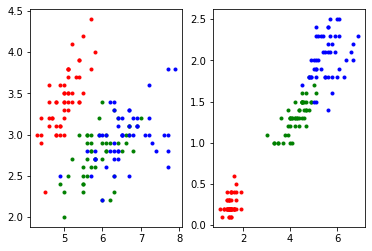

In [4]:
plt.subplot(121)
plt.plot(df['SL'][df['target']==0],df['SW'][df['target']==0],'r.')
plt.plot(df['SL'][df['target']==1],df['SW'][df['target']==1],'g.')
plt.plot(df['SL'][df['target']==2],df['SW'][df['target']==2],'b.')
plt.subplot(122)
plt.plot(df['PL'][df['target']==0],df['PW'][df['target']==0],'r.')
plt.plot(df['PL'][df['target']==1],df['PW'][df['target']==1],'g.')
plt.plot(df['PL'][df['target']==2],df['PW'][df['target']==2],'b.')


In [5]:
from sklearn.model_selection import train_test_split
xtr,xts,ytr,yts = train_test_split(df[['SL','SW','PL','PW']],df['target'],test_size=.2)

In [70]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [7]:
model.predict(xts)

array([1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 1,
       1, 2, 0, 2, 0, 1, 2, 0])

In [8]:
# np.array(model.predict_proba(xts).tolist())
xts.iloc[0]

SL    5.5
SW    2.4
PL    3.8
PW    1.1
Name: 80, dtype: float64

### Nearest Neighbors

In [9]:
# data point terdekat dengan xts.iloc[0] = 5.5, 2.4, 3.7, 1.0
from sklearn.neighbors import NearestNeighbors
x = NearestNeighbors(n_neighbors = 11)
x.fit(xtr)
x.kneighbors([xts.iloc[0]])

(array([[0.17320508, 0.3       , 0.42426407, 0.42426407, 0.4472136 ,
         0.52915026, 0.52915026, 0.54772256, 0.57445626, 0.58309519,
         0.58309519]]),
 array([[107,  55,  22,   8,  98,   1, 109,  73,  51,  49,  67]],
       dtype=int64))

In [10]:
# data point terdekat dengan xts.iloc[0] = 5.5, 2.4, 3.7, 1.0
xtr.loc[18]

SL    5.7
SW    3.8
PL    1.7
PW    0.3
Name: 18, dtype: float64

In [11]:
# data point terdekat dengan xts.iloc[0] = 5.5, 2.4, 3.7, 1.0
xtr.iloc[18]

SL    6.1
SW    3.0
PL    4.6
PW    1.4
Name: 91, dtype: float64

#### K Value

1. sqrt(n) : akar dari total data point
2. Pilih nilai yang ganjil

In [12]:
len(xtr)

120

In [13]:
k = round(len(xtr)**.5)
k

11

In [14]:
model1 = KNeighborsClassifier(n_neighbors = k)
model1.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [15]:
print(model.score(xts,yts))
print(model1.score(xts,yts))

0.9666666666666667
0.9666666666666667


In [16]:
print(model.predict([[5.5, 2.4, 3.7, 1.0]]))
print(model1.predict([[5.5, 2.4, 3.7, 1.0]]))

[1]
[1]


In [17]:
print(yts.loc[xts.iloc[0].name])
xts.iloc[0]

1


SL    5.5
SW    2.4
PL    3.8
PW    1.1
Name: 80, dtype: float64

In [18]:
from sklearn.metrics import classification_report
print(classification_report(yts,model.predict(xts)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.92      0.96        12
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



<hr>


In [19]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
dir(bc)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [20]:
df1 = pd.DataFrame(bc['data'],columns=bc['feature_names'])

df1['target'] = bc['target']
df1.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
df1.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [22]:
# df1.corr()['target'][df1.corr()['target'] < -0.5].index
np.array(df1.corr()['target'][df1.corr()['target'] < -0.5].index)

array(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points'], dtype=object)

In [25]:
i = df1.corr()['target'][df1.corr()['target'] < -0.5].index

df2 = df1[i]
df2['target'] = df1['target']
df2.head()


E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,mean radius,mean perimeter,mean area,mean compactness,mean concavity,mean concave points,radius error,perimeter error,area error,worst radius,worst perimeter,worst area,worst compactness,worst concavity,worst concave points,target
0,17.99,122.80,1001.0,0.27760,0.3001,0.14710,1.0950,8.589,153.40,25.38,184.60,2019.0,0.6656,0.7119,0.2654,0
1,20.57,132.90,1326.0,0.07864,0.0869,0.07017,0.5435,3.398,74.08,24.99,158.80,1956.0,0.1866,0.2416,0.1860,0
2,19.69,130.00,1203.0,0.15990,0.1974,0.12790,0.7456,4.585,94.03,23.57,152.50,1709.0,0.4245,0.4504,0.2430,0
3,11.42,77.58,386.1,0.28390,0.2414,0.10520,0.4956,3.445,27.23,14.91,98.87,567.7,0.8663,0.6869,0.2575,0
4,20.29,135.10,1297.0,0.13280,0.1980,0.10430,0.7572,5.438,94.44,22.54,152.20,1575.0,0.2050,0.4000,0.1625,0


<hr>

### Standard Scaler

In [29]:
# Biar ga jomplang di standardise dulu
from sklearn.preprocessing import StandardScaler
stdscaler = StandardScaler()

# target tidak diikutsertakan
datastd = stdscaler.fit_transform(df2.iloc[:,:-1])

In [51]:
# Check outlier, -2.5 < z-score > 2.5
dfZscore = pd.DataFrame(datastd)
dfZscore[(dfZscore < -2.5) | (dfZscore > 2.5)] = np.NaN
dfZscore

# Masukin target lagi
dfZscore['target'] = df2['target']
dfZscore.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,target
0,1.829821,1.685955,1.908708,-0.487072,-0.023846,0.548144,0.499255,0.263327,0.742402,1.805927,1.535126,1.890489,-0.430444,-0.146749,1.087084,0
1,1.579888,1.566503,1.558884,1.052926,1.363478,2.037231,1.228676,0.850928,1.181336,1.511870,1.347475,1.456285,1.082932,0.854974,1.955000,0
2,1.750297,1.776573,1.826229,0.539340,1.371011,1.428493,1.270543,1.273189,1.190357,1.298575,1.338539,1.220724,-0.313395,0.613179,0.729259,0
3,-0.476375,-0.387148,-0.505650,1.244335,0.866302,0.824656,-0.255070,-0.321304,-0.289258,-0.165498,-0.115009,-0.244320,1.721616,1.263243,0.905888,0
4,1.170908,1.138125,1.095295,0.088295,0.300072,0.646935,0.149883,0.155410,0.298627,1.368983,1.368325,1.275220,0.021215,0.509552,1.196716,0


In [53]:
# Deleting the outliers data
dfZscore = dfZscore.dropna()
dfZscore.head()
dfZscore.shape


(516, 16)

In [57]:
datastd = np.array(dfZscore.iloc[:,:-1])
datastd[0]

array([ 1.82982061,  1.68595471,  1.90870825, -0.48707167, -0.02384586,
        0.54814416,  0.4992546 ,  0.26332697,  0.74240195,  1.80592744,
        1.53512599,  1.89048899, -0.43044422, -0.14674897,  1.0870843 ])

### PCA

In [58]:
from sklearn import decomposition
pca = decomposition.PCA(n_components = 3)

datapca = pca.fit_transform(datastd)
datapca[0]

array([ 4.24293416, -2.66952123, -0.86054826])

In [59]:
pca.n_components

3

In [60]:
pca.explained_variance_ratio_

array([0.7473689 , 0.14043917, 0.06210436])

In [ ]:
# inverse ke value semula
stdscaler.inverse_transform(pca)

### Pipeline: Standard Scaler + PCA

In [37]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(),
        decomposition.PCA(n_components = 3))
stdpca = pipe.fit_transform(df2.iloc[:,:-1])
stdpca[0]
                                     

array([ 8.29601665, -1.61286602,  2.2463328 ])

In [38]:
# inverse ke value semula
pipe.inverse_transform(stdpca)[0]

array([1.89361465e+01, 1.29256168e+02, 1.18788294e+03, 2.60684046e-01,
       3.21696506e-01, 1.48732685e-01, 1.13852282e+00, 8.48284503e+00,
       1.49727446e+02, 2.37476708e+01, 1.65455426e+02, 1.80523551e+03,
       6.34443510e-01, 7.90349764e-01, 2.67061632e-01])

<hr>

### Splitting datasets

In [63]:
x = datapca
y = np.array(dfZscore['target'])
print(x.shape,y.shape)

(516, 3) (516,)


In [64]:
from sklearn.model_selection import train_test_split

xtr,xts,ytr,yts = train_test_split(x,y,test_size=.15)
print(xtr.shape,xts.shape)
print(ytr.shape,yts.shape)

(438, 3) (78, 3)
(438,) (78,)


### KNN

In [67]:
n = round(xtr.shape[0]**.5)
n


21

In [73]:
model2 = KNeighborsClassifier(n_neighbors = n)
model2.fit(xtr,ytr)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

### Evaluation Metrics